In [63]:
# 设置中文字体
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
from scipy.misc import imread
import codecs
from subprocess import check_output
terror=pd.read_csv('G:\math_modeling\data\gtd.csv')


terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror['casualities']=terror['Killed']+terror['Wounded']

terror.head(3)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1998,1,1,Burundi,Sub-Saharan Africa,Bujumbura,-3.375828,29.364107,Armed Assault,104.0,6.0,Burundi Military at Bujumbura Airport,01/01/1998: Hutu Rebels attacked a Burundi mil...,Hutu extremists,Military,Firearms,Unknown,110.0
1,1998,1,1,Russia,Eastern Europe,Moscow,55.751377,37.579914,Bombing/Explosion,0.0,3.0,An underground passage in the Moscow Metro,"01/01/1998: In Russia, a small bomb hidden in ...",Unknown,Transportation,Explosives,Unknown,3.0
2,1998,1,1,United Kingdom,Western Europe,Belfast,54.607712,-5.956210,Armed Assault,1.0,0.0,Eddie Trainor,01/01/1998: The breakaway Loyalist Volunteer F...,Loyalist Volunteer Forces (LVF),Private Citizens & Property,Firearms,Unknown,1.0


In [64]:
terror.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
city             434
latitude         934
longitude        934
AttackType         0
Killed          4280
Wounded         8232
Target           172
Summary            0
Group              0
Target_type        0
Weapon_type        0
Motive         64708
casualities     8539
dtype: int64

In [68]:
print('发生袭击事件数量最高的国家:',terror['Country'].value_counts().index[0])
print('发生袭击事件数量最高的地区:',terror['Region'].value_counts().index[0])
print('恐怖袭击事件造成死亡人数最高的数量:',terror['Killed'].max(),'发生在',terror.loc[terror['Killed'].idxmax()].Country)


发生袭击事件数量最高的国家: Iraq
发生袭击事件数量最高的地区: Middle East & North Africa
恐怖袭击事件造成死亡人数最高的数量: 1570.0 发生在 Iraq


## 统计每年恐怖事件数量

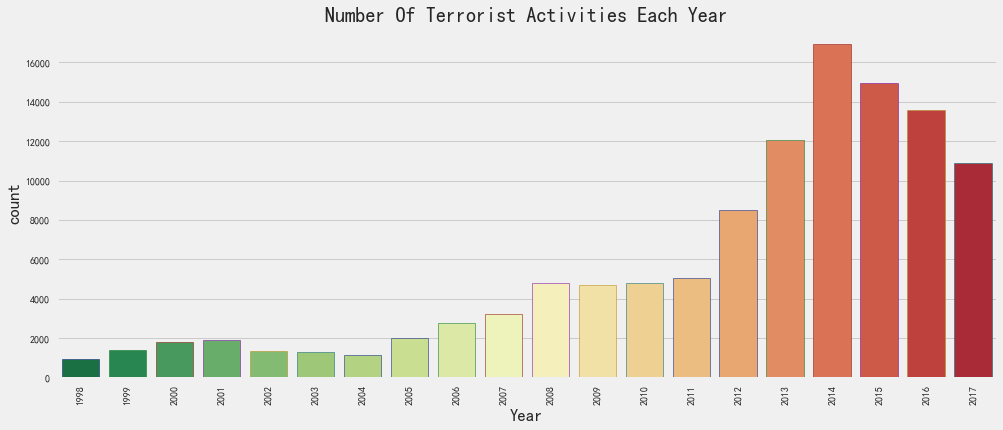

In [67]:
# 中文显示有问题
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

## 统计恐怖袭击者的袭击类型

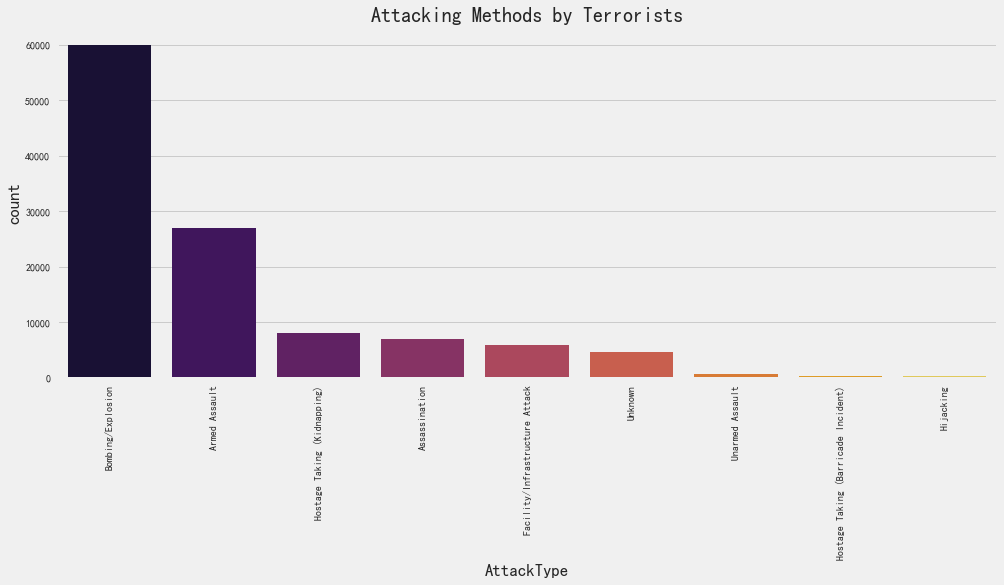

In [54]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=terror,palette='inferno',order=terror['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

## 统计恐怖主义最喜欢的攻击目标

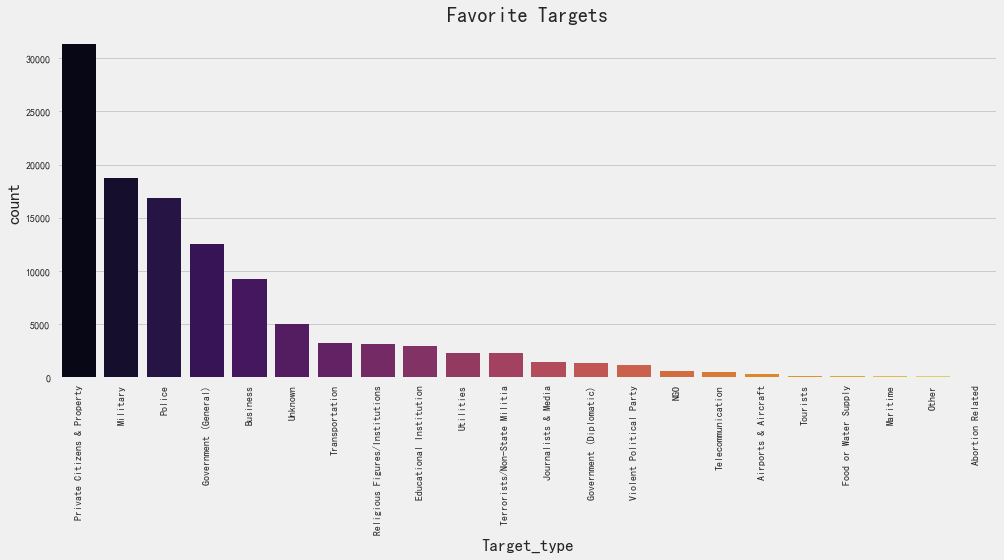

In [55]:
plt.subplots(figsize=(15,6))
sns.countplot(terror['Target_type'],palette='inferno',order=terror['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

## 4 全球恐怖袭击

伤亡者分布

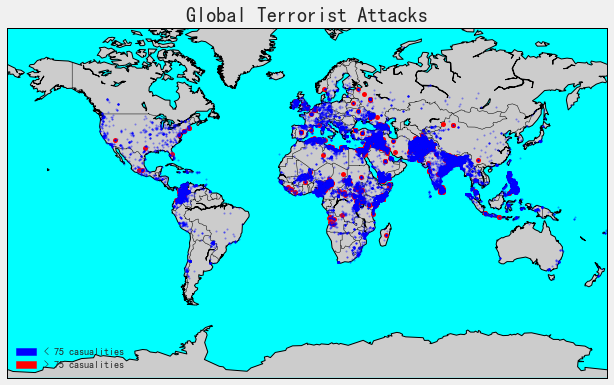

In [56]:
m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
lat_100=list(terror[terror['casualities']>=75].latitude)
long_100=list(terror[terror['casualities']>=75].longitude)
x_100,y_100=m3(long_100,lat_100)
m3.plot(x_100, y_100,'go',markersize=5,color = 'r')
lat_=list(terror[terror['casualities']<75].latitude)
long_=list(terror[terror['casualities']<75].longitude)
x_,y_=m3(long_,lat_)
m3.plot(x_, y_,'go',markersize=2,color = 'b',alpha=0.4)
m3.drawcoastlines()
m3.drawcountries()
m3.fillcontinents(lake_color='aqua')
m3.drawmapboundary(fill_color='aqua')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.title('Global Terrorist Attacks')
plt.legend(loc='lower left',handles=[mpatches.Patch(color='b', label = "< 75 casualities"),
                    mpatches.Patch(color='red',label='> 75 casualities')])
plt.show()

## 5 恐怖分子地域分布

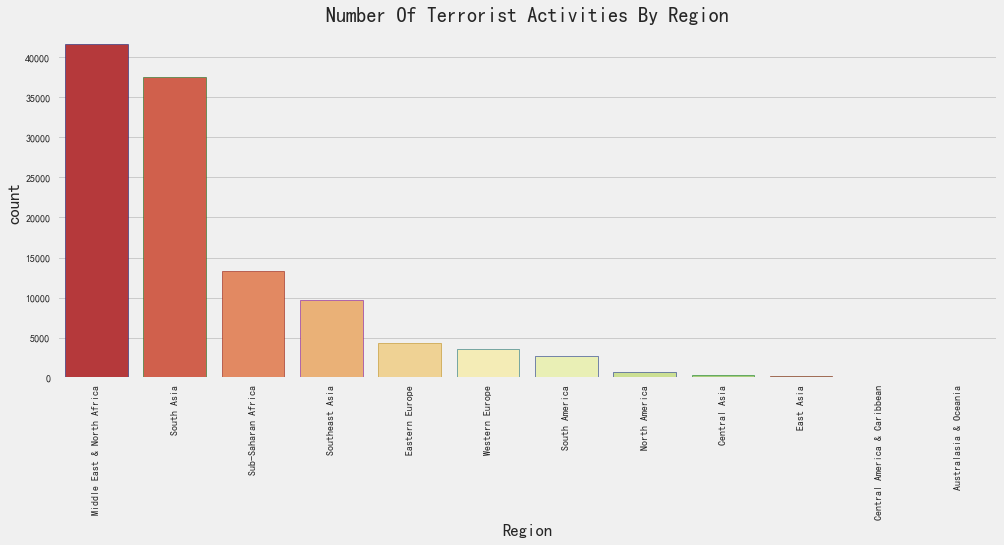

In [57]:
plt.subplots(figsize=(15,6))
sns.countplot('Region',data=terror,palette='RdYlGn',edgecolor=sns.color_palette('dark',7),order=terror['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

中东和北非是最容易发生恐怖主义的地区，其次是南亚。澳大利亚地区经历的恐怖事件非常少。总的来说，我们可以说非洲和亚洲大陆经历了最高的恐怖袭击。但为什么这些地区容易发生恐怖主义？这与人民的心态有什么关系吗？或任何其他原因??

## 恐怖分子活动趋势

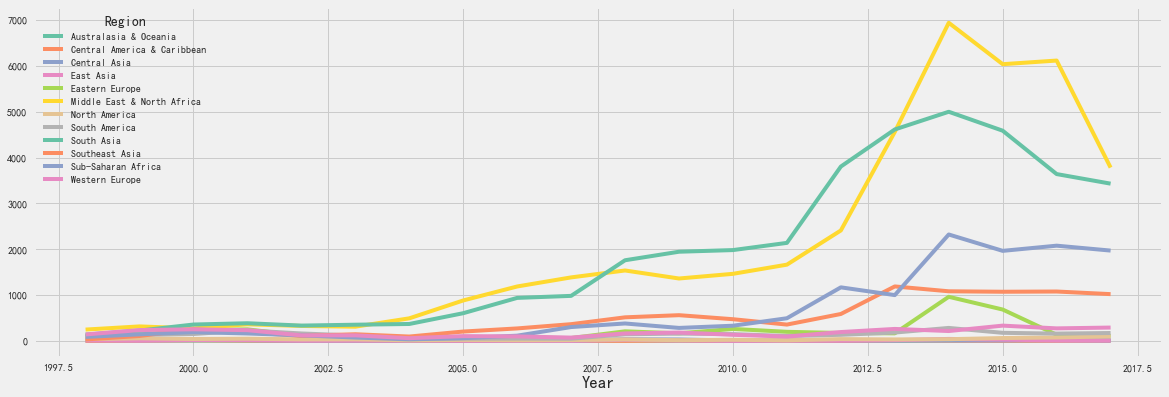

In [58]:
terror_region=pd.crosstab(terror.Year,terror.Region)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

如上所述，中东，北非，南亚多年来恐怖主义活动的数量有所增加

### 袭击类型 vs 地域

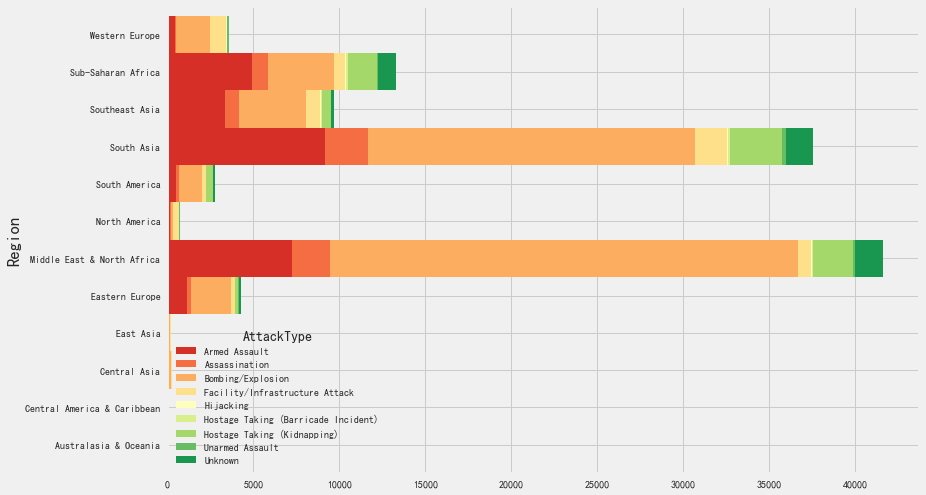

In [59]:
pd.crosstab(terror.Region,terror.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

如上所述，无论是哪个区域，轰炸和武装攻击是最突出的攻击类型，

## 6 各国之间的恐怖事件

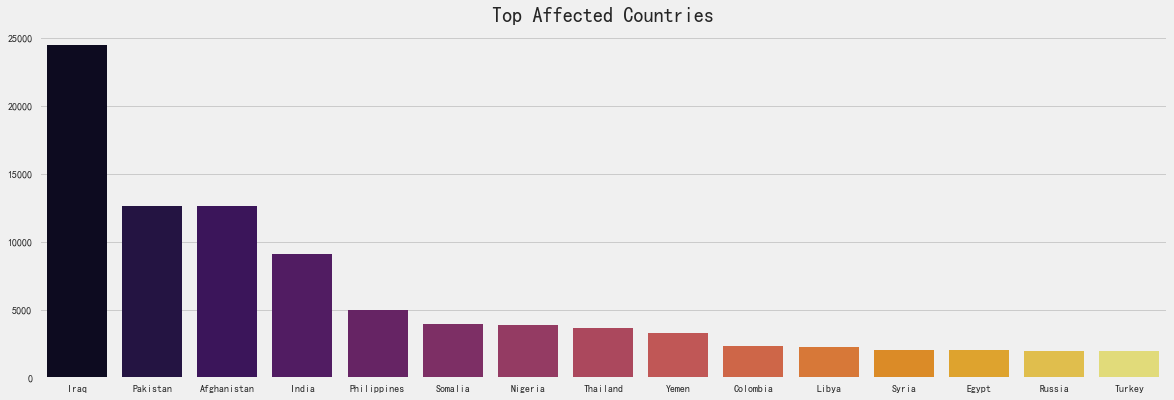

In [60]:
plt.subplots(figsize=(18,6))
sns.barplot(terror['Country'].value_counts()[:15].index,terror['Country'].value_counts()[:15].values,palette='inferno')
plt.title('Top Affected Countries')
plt.show()

伊拉克目睹了巴基斯坦发生的大量恐怖主义活动。有一点需要注意的是攻击率最高的国家，大多是人口密集的国家，因此它最终会夺去许多生命。让我们检查下是否这样

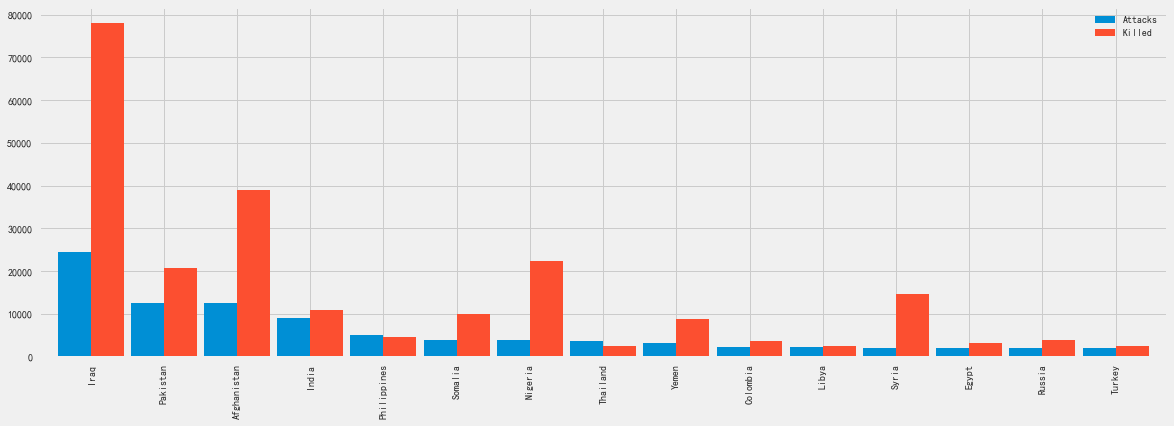

In [61]:
coun_terror=terror['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=terror.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()